In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Carregamento dos dados, análise exploratória e pré-processamento

In [60]:
# Carregamento dos dados
df = pd.read_csv("alzheimer.csv")

In [61]:
# Análise exploratória
print('\nHead:')
print(df.head())

print('\nDataset Info:')
df.info()

print('\nMissing Values Count:')
display(df.isnull().sum())


Head:
         Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0  Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1  Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2     Demented   M   75    12  NaN  23.0  0.5  1678  0.736  1.046
3     Demented   M   76    12  NaN  28.0  0.5  1738  0.713  1.010
4     Demented   M   80    12  NaN  22.0  0.5  1698  0.701  1.034

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), obj

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [62]:
# Separação dos valores numéricos e categóricos para cleaning e tratamento de NaN's
numeric_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
categorical_cols = ['Group', 'M/F']

# Tratamento dos valores numéricos
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Preenchimento da coluna {col} com os valores médios {median_val}")

# Tratamento dos valores categóricos
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Preenchimento da coluna {col} com a moda dos valores '{mode_val}'")

# Nova checagem sobre valores faltantes
print('\nMissing values após tratamento:')
display(df[numeric_cols + categorical_cols].isnull().sum())

Preenchimento da coluna SES com os valores médios 2.0
Preenchimento da coluna MMSE com os valores médios 29.0

Missing values após tratamento:


/tmp/ipykernel_170830/2189618399.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_170830/2189618399.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Group    0
M/F      0
dtype: int64

In [ ]:
# Encoding das variáveis categóricas através do Label encoding
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,2,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,2,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


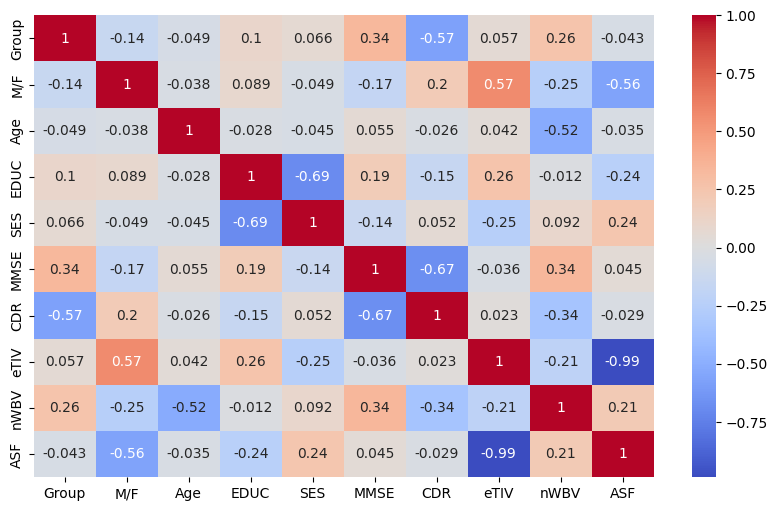

In [64]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

scaler = StandardScaler()
numerical_features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
data = df.to_numpy()
data

array([[ 2.        ,  1.        ,  1.30873772, ...,  2.83605891,
        -0.90516867, -2.2657425 ],
       [ 2.        ,  1.        ,  1.43978716, ...,  2.93270307,
        -1.30964265, -2.31650145],
       [ 1.        ,  1.        , -0.26385558, ...,  1.07940909,
         0.17342861, -1.08378418],
       ...,
       [ 2.        ,  0.        , -2.09854775, ..., -0.96148827,
         1.92614919,  0.98283006],
       [ 2.        ,  0.        , -1.83644887, ..., -0.91600866,
         1.79132453,  0.92481984],
       [ 2.        ,  0.        , -1.57434999, ..., -0.88189896,
         1.92614919,  0.88131217]])

## Execução dos dados em um hardware quântico

In [69]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import StatevectorSampler as Sampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [ ]:
# Passo 1: Preparação dos dados
y = data[:,0]
X = data[:, 1:]

'''
# Redução de dimensionalidade
X = PCA(n_components=5).fit_transform(X)
print('Features após PCA:', X)
'''

# Passo 2: Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
num_features = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

In [92]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = [12, 6]

def callback(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objetivo vs Iteração")
    plt.xlabel("Iteração")
    plt.ylabel("Valor da função objetivo")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

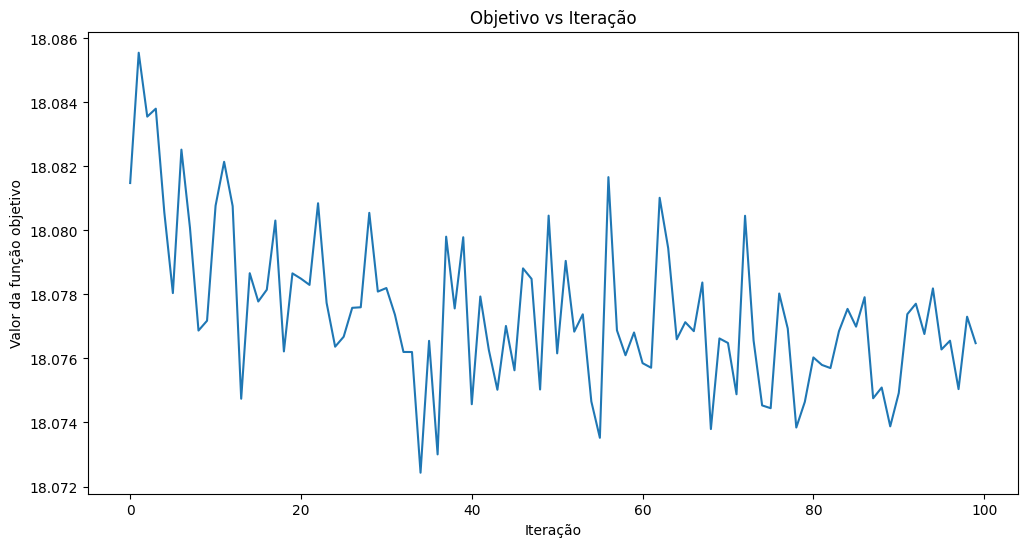

In [93]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback
)

vqc.fit(X_train, y_train)

In [94]:
train_score = vqc.score(X_train, y_train)
test_score = vqc.score(X_test, y_test)

print(f"Quantum VQC on the training dataset: {train_score:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score:.2f}")

Quantum VQC on the training dataset: 0.26
Quantum VQC on the test dataset:     0.21
